In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Transform the data in the txt file into a dataframe

In [8]:
# Read the file into a list of lines
with open('wiki-RfA.txt', 'r') as file:
    lines = file.readlines()

# Create a list of dictionaries, where each dictionary represents a record
df = []
current_entry = {}

# Iterate through each line, current_entry = one log entry with all columns, df = list of all votee/voter pairs
for line in lines:
    line = line.strip()
    if line:
        key, value = line.split(':', 1)
        current_entry[key] = value
    else:
        df.append(current_entry)
        current_entry = {}

# Append  last record
if current_entry:
    df.append(current_entry)

# Convert into DataFrame and store in csv
df = pd.DataFrame(df)
df.columns = ['Source', 'Target', 'Vote', 'Results', 'Year', 'Date', 'Comment']
df


,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,"02:51, 2 Sep 2003",Support
198271,Angela,WhisperToMe,1,1,2003,"23:45, 26 Nov 2003",Support.
198272,Jiang,WhisperToMe,1,1,2003,,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,"05:38, 5 Dec 2003",Support. Age has nothing to do with maturity....


# Handle inconsistent data

In [9]:
# Set Nan values
# replace field that's entirely space (or empty) with NaN (the case for some Source, Date and Comment)
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

#handle NaN values in Comment for vectorization
df['Comment'] = df['Comment'].apply(lambda x: [] if (isinstance(x, float) and np.isnan(x)) else x)

# replace inconsistent date
df['Date'] = df['Date'].str.replace('Julu ', 'July ')
df['Date'] = df['Date'].str.replace('Janry ', 'January ')
df['Date'] = df['Date'].str.replace('Mya ', 'May ')
df['Date'] = df['Date'].str.replace('Jan ', 'January ')
df['Date'] = df['Date'].str.replace('Feb ', 'February ')
df['Date'] = df['Date'].str.replace('Mar ', 'March ')
df['Date'] = df['Date'].str.replace('Apr ', 'April ')
df['Date'] = df['Date'].str.replace('Jun ', 'June ')
df['Date'] = df['Date'].str.replace('Jul ', 'July ')
df['Date'] = df['Date'].str.replace('Aug ', 'August ')
df['Date'] = df['Date'].str.replace('Sep ', 'September ')
df['Date'] = df['Date'].str.replace('Oct ', 'October ')
df['Date'] = df['Date'].str.replace('Nov ', 'November ')
df['Date'] = df['Date'].str.replace('Dec ', 'December ')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%H:%M, %d %B %Y', errors='coerce')

df

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1,2013,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1,2013,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1,2013,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1,2013,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1,2013,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."
...,...,...,...,...,...,...,...
198270,172,Vancouverguy,1,1,2003,2003-09-02 02:51:00,Support
198271,Angela,WhisperToMe,1,1,2003,2003-11-26 23:45:00,Support.
198272,Jiang,WhisperToMe,1,1,2003,NaT,Support. --
198273,Pakaran,WhisperToMe,1,1,2003,2003-12-05 05:38:00,Support. Age has nothing to do with maturity....


### Check for duplicates in the data

In [32]:
dupl = df[df.duplicated(subset=['Source', 'Target', 'Vote', 'Year', 'Date', 'Comment'], keep=False) & (df.Date.notnull())].sort_values(by=['Target', 'Date', 'Source'])
display(dupl)
# Check the percentage of support votes
dupl.groupby('Target').Vote.value_counts(normalize=True) * 100


,Source,Target,Vote,Results,Year,Date,Comment
87127,Kusma,AzaToth,1,1,2007,2007-01-09 16:05:00,"'''Strong support''', great template wizard an..."
111493,Kusma,AzaToth,1,-1,2007,2007-01-09 16:05:00,"'''Strong support''', great template wizard an..."
87128,Rory096,AzaToth,1,1,2007,2007-01-09 16:12:00,"'''Support''', thought he already was one. Opp..."
111494,Rory096,AzaToth,1,-1,2007,2007-01-09 16:12:00,"'''Support''', thought he already was one. Opp..."
87129,MatthewFenton,AzaToth,1,1,2007,2007-01-09 16:14:00,"'''Support''' <small><font face=""Tahoma"">'''th..."
...,...,...,...,...,...,...,...
170237,Masssiveego,Viridae,-1,-1,2006,2006-08-02 08:24:00,'''Weak Oppose.''' Per above. --
151107,DarthVader,Viridae,1,1,2006,2006-08-02 13:12:00,'''Support''' per above. Would make a good adm...
170224,DarthVader,Viridae,1,-1,2006,2006-08-02 13:12:00,'''Support''' per above. Would make a good adm...
151126,Slgrandson,Viridae,0,1,2006,2006-08-02 13:30:00,'''Neutral''': The edits and summary usage are...


Target        Vote
AzaToth       1        61.956522
              -1       26.086957
              0        11.956522
Cholmes75     1        57.407407
              -1       31.481481
              0        11.111111
CyborgTosser  1        69.565217
              0        17.391304
              -1       13.043478
Daniel Olsen  -1       54.545455
              1        36.363636
              0         9.090909
Femto         1        50.000000
              0        26.923077
              -1       23.076923
HighInBC      -1       52.272727
              1        25.000000
              0        22.727273
Martinp23     -1       43.243243
              1        35.135135
              0        21.621622
Moreschi      1        75.531915
              -1       18.085106
              0         6.382979
Ohnoitsjamie  1        44.444444
              -1       37.037037
              0        18.518519
Rama's Arrow  1        64.179104
              -1       28.358209
              0         

In [40]:
a = df[['Source', 'Target', 'Vote', 'Results', 'Date', 'Comment']].sort_values(by=['Target', 'Date', 'Source'])
for i in range(0, len(df), 60):
    #print(dupl[dupl.Target == 'Robchurch'].iloc[i:i+60])
    print(a[a.Target == 'Robchurch'].iloc[i:i+60])

                     Source     Target Vote Results                Date  \
183093     NicholasTurnbull  Robchurch    1       1 2005-10-10 00:21:00   
189912     NicholasTurnbull  Robchurch    1      -1 2005-10-10 00:21:00   
183094      Private Butcher  Robchurch    1       1 2005-10-10 00:24:00   
189913      Private Butcher  Robchurch    1      -1 2005-10-10 00:24:00   
183095               Ral315  Robchurch    1       1 2005-10-10 00:54:00   
189914               Ral315  Robchurch    1      -1 2005-10-10 00:54:00   
183096      Sebastiankessel  Robchurch    1       1 2005-10-10 01:20:00   
189915      Sebastiankessel  Robchurch    1      -1 2005-10-10 01:20:00   
183097               Rogerd  Robchurch    1       1 2005-10-10 01:25:00   
189916               Rogerd  Robchurch    1      -1 2005-10-10 01:25:00   
183098     Hamster Sandwich  Robchurch    1       1 2005-10-10 01:37:00   
189917     Hamster Sandwich  Robchurch    1      -1 2005-10-10 01:37:00   
183099         Mindspilla

In [5]:
# look for duplicates in the data
a = df[df.duplicated()]
for i in range(0, len(a), 60):
    print(a.iloc[i:i+60])

       Source                  Target Vote Results  Year Date Comment
708       NaN             Jason Quinn    0       1  2013  NaT     NaN
1128      NaN           Mattythewhite   -1       1  2013  NaT     NaN
4546      NaN            Dennis Brown   -1       1  2012  NaT     NaN
6992      NaN                       Σ   -1      -1  2012  NaT     NaN
7033      NaN                       Σ   -1      -1  2012  NaT     NaN
11438     NaN              ErikHaugen    1       1  2011  NaT     NaN
13195     NaN                 Kudpung    1       1  2011  NaT     NaN
14117     NaN          Reaper Eternal    1       1  2011  NaT     NaN
18714     NaN             Airplaneman    1       1  2010  NaT     NaN
18770     NaN             Airplaneman    1       1  2010  NaT     NaN
18910     NaN          AlexandrDmitri    1       1  2010  NaT     NaN
21192     NaN               Everyking    1       1  2010  NaT     NaN
27558     NaN             Airplaneman   -1      -1  2010  NaT     NaN
36815     NaN       

In [7]:
df[df.Target == 'Robchurch'].sort_values(by=['Date'])

,Source,Target,Vote,Results,Year,Date,Comment
189912,NicholasTurnbull,Robchurch,1,-1,2005,2005-10-10 00:21:00,"Why, of course. --"
183093,NicholasTurnbull,Robchurch,1,1,2005,2005-10-10 00:21:00,"Why, of course. --"
189913,Private Butcher,Robchurch,1,-1,2005,2005-10-10 00:24:00,"'''[[Soup|Support]]''', I'm supporting, hopefu..."
183094,Private Butcher,Robchurch,1,1,2005,2005-10-10 00:24:00,"'''[[Soup|Support]]''', I'm supporting, hopefu..."
183095,Ral315,Robchurch,1,1,2005,2005-10-10 00:54:00,"'''Support''' again. Good user, good person, ..."
...,...,...,...,...,...,...,...
166071,FireFox,Robchurch,1,-1,2006,NaT,Support. — FireFox (<small>
166185,Cuivienen,Robchurch,-1,-1,2006,NaT,'''Changed to Oppose''' per [[User:MLA|MLA]] a...
166216,NaN,Robchurch,-1,-1,2006,NaT,NaN
183126,WikiFanatic,Robchurch,1,1,2005,NaT,'''Support.''' We've gotten on each other's ne...


# Store the dataframe in a csv file

In [10]:
df.to_csv('wiki-RfA.csv')

# Some global statistics and visualisation 

In [11]:
stats = df.describe(include='all')
stats.loc['perc_nan'] = (1 - stats.loc['count'] / len(df)) * 100
stats

,Source,Target,Vote,Results,Year,Date,Comment
count,196614,198275,198275,198275,198275,188907,198275
unique,10416,3497,3,2,11,NaN,163219
top,Siva1979,Everyking,1,1,2006,NaN,[]
freq,1232,987,144451,123288,45325,NaN,7190
mean,NaN,NaN,NaN,NaN,NaN,2008-01-23 01:07:40.444663296,NaN
min,NaN,NaN,NaN,NaN,NaN,2003-08-16 01:25:00,NaN
25%,NaN,NaN,NaN,NaN,NaN,2006-07-08 13:40:00,NaN
50%,NaN,NaN,NaN,NaN,NaN,2007-09-17 05:10:00,NaN
75%,NaN,NaN,NaN,NaN,NaN,2009-04-09 01:31:00,NaN
max,NaN,NaN,NaN,NaN,NaN,2013-06-05 19:50:00,NaN


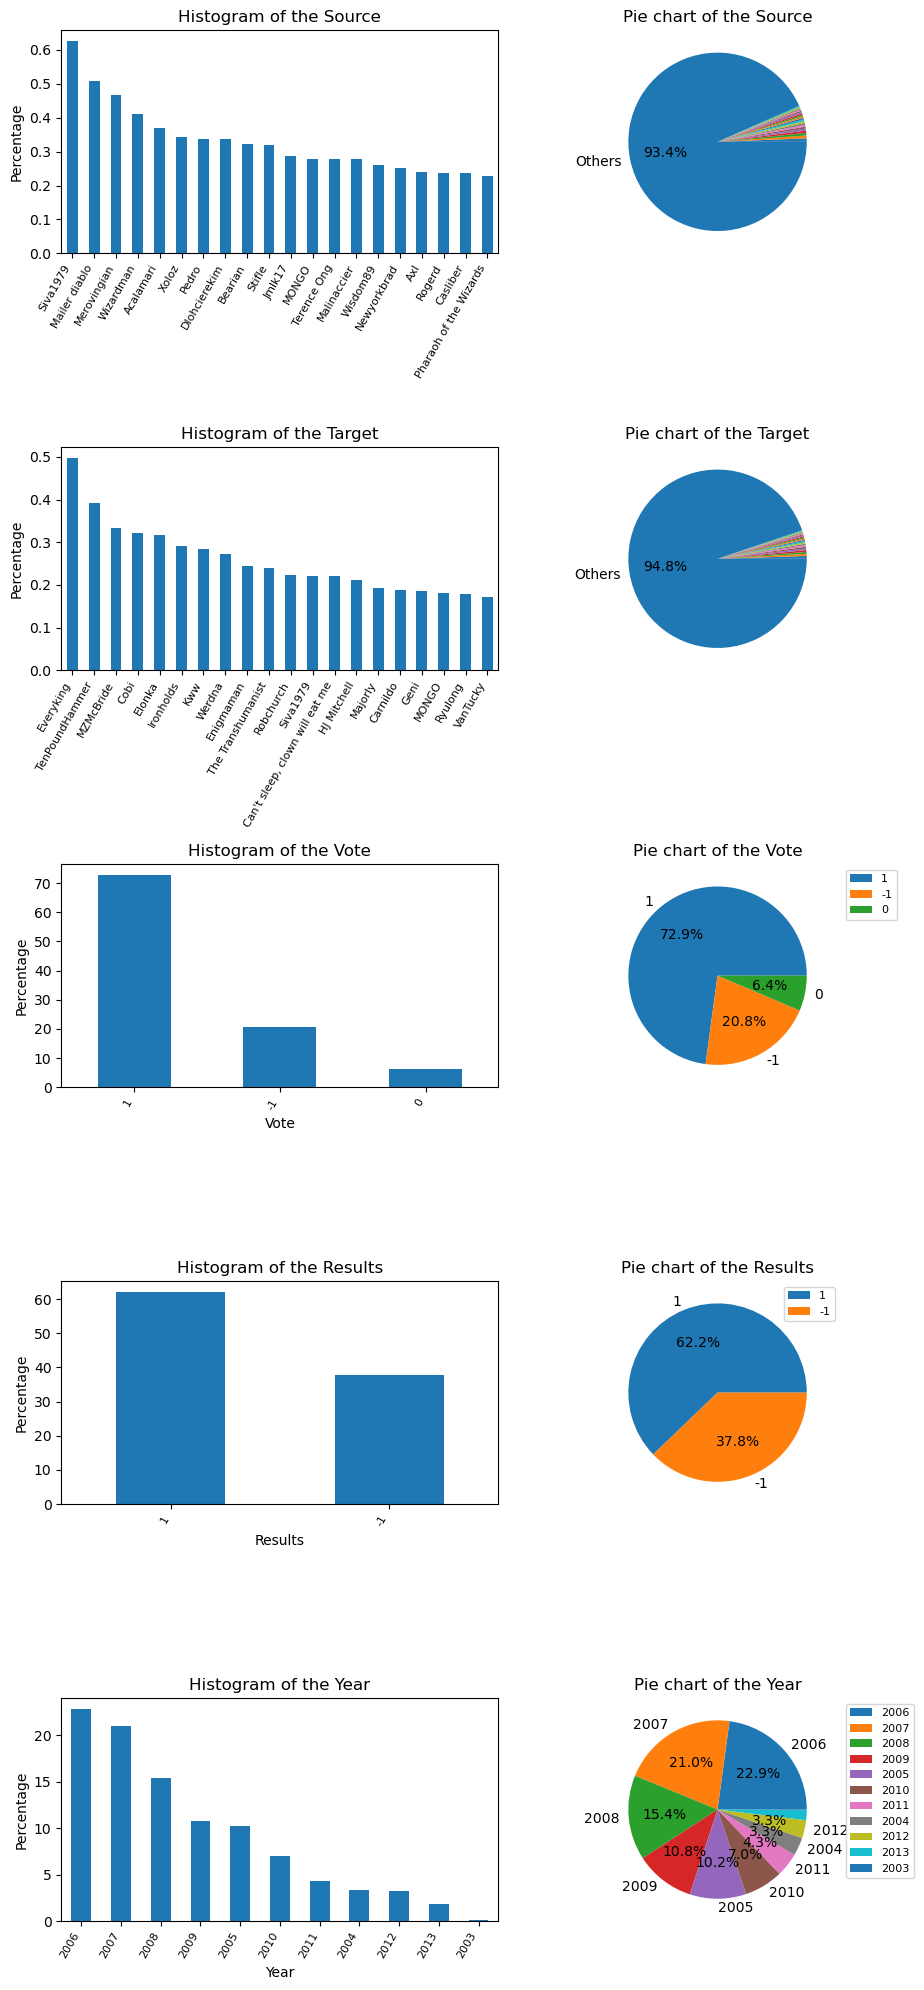

In [12]:
warnings.filterwarnings('ignore')
categorical_cols = ['Source', 'Target']
value_cols = ['Vote', 'Results', 'Year']
all_cols = categorical_cols + value_cols
n_top = 20
fig, axes = plt.subplots(len(all_cols), 2, figsize=(10,4*len(all_cols)))
for i, col in enumerate(all_cols):
    ax1 = axes[(2*i) // 2, (2*i) % 2]
    ax2 = axes[(2*i+1) // 2, (2*i+1) % 2]
    data = df[~df[col].isna()]
    if col in categorical_cols:
        top_n = pd.Series(data[col].value_counts().iloc[:n_top])
        others = pd.Series(data[col].value_counts().iloc[n_top:].sum(), index=['Others'])
        value_counts = pd.concat([top_n, others])
        
    elif col in value_cols:
        value_counts = data[col].value_counts()
    
    value_counts = 100*value_counts/np.sum(value_counts)
    labels = value_counts.index.to_list()

    # Count plot
    chart = value_counts[value_counts.index != 'Others'].plot(kind='bar', ax=ax1) 
    chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right', fontsize = 8)
    ax1.set_title('Histogram of the ' + col)
    ax1.set_ylabel('Percentage')
    
    # Pie chart
    wedges, texts, autotexts = ax2.pie(value_counts, labels = labels, autopct='%1.1f%%')
    threshold = 2
    for label, pct_label in zip(texts, autotexts):
        pct_value = pct_label.get_text().rstrip('%')
        if float(pct_value) < threshold:
            label.set_text('')
            pct_label.set_text('')
    
    #if too much labels, don't show legend
    if len(labels) < 12:
        ax2.legend(bbox_to_anchor=(1.05, 1), fontsize = 8)
    ax2.set_title('Pie chart of the ' + col)

fig.tight_layout()    
plt.show()